# For 10 Variables

# Using SDG as an optimizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

In [2]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
# Generate XOR dataset with 10 variables (binary inputs)
n_samples = 1000
X = np.random.randint(0, 2, size=(n_samples, 10))
y = np.logical_xor.reduce(X, axis=1).astype(int).reshape(-1, 1)

In [13]:
X

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 0]])

In [19]:
# Initialize network parameters
np.random.seed(42)
input_dim = X.shape[1]
hidden_dim = 3
output_dim = 1
learning_rate = 0.001

In [20]:

theta1 = np.random.rand(input_dim, hidden_dim)
theta2 = np.random.rand(hidden_dim, hidden_dim)
theta3 = np.random.rand(hidden_dim, output_dim)

bias1 = np.zeros((1, hidden_dim))
bias2 = np.zeros((1, hidden_dim))
bias3 = np.zeros((1, output_dim))

In [21]:
losses = []

In [22]:
epochs = 1000

In [23]:
for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, theta1) + bias1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, theta2) + bias2
    a2 = sigmoid(z2)
    
    z3 = np.dot(a2, theta3) + bias3
    a3 = sigmoid(z3)
    
    # Compute loss (cross-entropy)
    loss = -np.mean(y * np.log(a3 + 1e-9) + (1 - y) * np.log(1 - a3 + 1e-9))
    losses.append(loss)
    
    # Backpropagation
    error3 = a3 - y
    d_theta3 = np.dot(a2.T, error3)
    d_bias3 = np.sum(error3, axis=0, keepdims=True)
    
    error2 = np.dot(error3, theta3.T) * sigmoid_derivative(a2)
    d_theta2 = np.dot(a1.T, error2)
    d_bias2 = np.sum(error2, axis=0, keepdims=True)
    
    error1 = np.dot(error2, theta2.T) * sigmoid_derivative(a1)
    d_theta1 = np.dot(X.T, error1)
    d_bias1 = np.sum(error1, axis=0, keepdims=True)
    
    # Update weights and biases (SGD)
    theta1 -= learning_rate * d_theta1
    bias1 -= learning_rate * d_bias1
    theta2 -= learning_rate * d_theta2
    bias2 -= learning_rate * d_bias2
    theta3 -= learning_rate * d_theta3
    bias3 -= learning_rate * d_bias3
    
    # Print loss every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.7916
Epoch 10, Loss: 0.6928
Epoch 20, Loss: 0.6928
Epoch 30, Loss: 0.6928
Epoch 40, Loss: 0.6928
Epoch 50, Loss: 0.6928
Epoch 60, Loss: 0.6928
Epoch 70, Loss: 0.6928
Epoch 80, Loss: 0.6928
Epoch 90, Loss: 0.6928
Epoch 100, Loss: 0.6928
Epoch 110, Loss: 0.6928
Epoch 120, Loss: 0.6928
Epoch 130, Loss: 0.6928
Epoch 140, Loss: 0.6928
Epoch 150, Loss: 0.6928
Epoch 160, Loss: 0.6928
Epoch 170, Loss: 0.6928
Epoch 180, Loss: 0.6928
Epoch 190, Loss: 0.6928
Epoch 200, Loss: 0.6928
Epoch 210, Loss: 0.6928
Epoch 220, Loss: 0.6928
Epoch 230, Loss: 0.6928
Epoch 240, Loss: 0.6928
Epoch 250, Loss: 0.6928
Epoch 260, Loss: 0.6928
Epoch 270, Loss: 0.6928
Epoch 280, Loss: 0.6928
Epoch 290, Loss: 0.6928
Epoch 300, Loss: 0.6928
Epoch 310, Loss: 0.6928
Epoch 320, Loss: 0.6928
Epoch 330, Loss: 0.6928
Epoch 340, Loss: 0.6928
Epoch 350, Loss: 0.6928
Epoch 360, Loss: 0.6928
Epoch 370, Loss: 0.6928
Epoch 380, Loss: 0.6928
Epoch 390, Loss: 0.6928
Epoch 400, Loss: 0.6928
Epoch 410, Loss: 0.6928
Epo

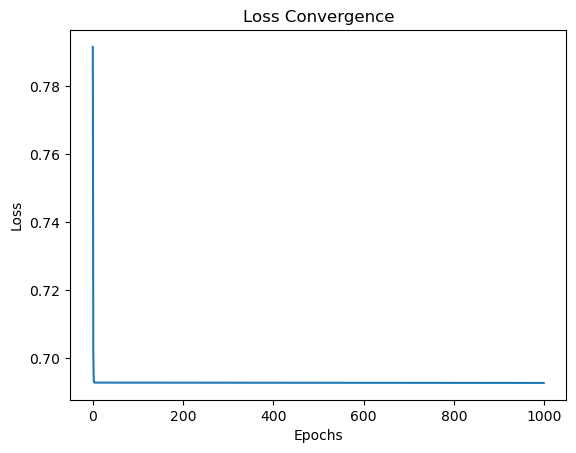

In [24]:
# Plot convergence plot
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.show()

In [25]:
# Predictions
y_pred = (a3 > 0.5).astype(int)

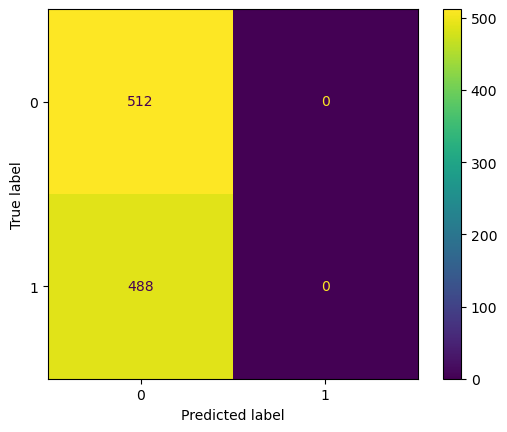

In [26]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
